<a href="https://colab.research.google.com/github/arnaldocaetanocardoso/optimization_code/blob/main/quast%C3%A3o2_2_1_lista4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/arnaldocaetanocardoso/optimization_code #line_searchy.pyhttps://github.com/arnaldocaetanocardoso/optimization_code/blob/5f3fb1dac75952e2e43fbfea99900540678ca96b/line_searchy.py
import sys
sys.path.append('/content/optimization_code/')
import line_searchy as ls
import numpy as np
import matplotlib.pyplot as plt

#comando para buscar no repositório doo git as funções desenvolvidas previamente, para chamar o código devo digitar "ls."
# quando digitar terei as opções de funções salvas dentro desse código.
#x0 = solução inicial ; f = função objetivo ; grad  = gradiente da função ; tolerânia = ponto de mínimo local, grad = 0;; alpha = fixo; line_search = método de aproximação quadrática.
#np.linalg.norm é usando biblioteca para calcular a norma do gradiente.


fatal: destination path 'optimization_code' already exists and is not an empty directory.


In [2]:
def gradient_descent(x,f,grad,tol=1e-6,alpha=[],line_search=ls.quadratic_fit_search):

  lx = [x]
  lfx = [f(x)]
  gradx = grad(x);

  while np.linalg.norm(gradx) > tol:

    if not alpha:  #caso o usuário não tenha passado o alpha, essa função calcula ele.
      f_aux = lambda a : f(x-a*gradx)
      bracket = ls.bracket(0,f_aux);
      alpha = line_search(f, bracket[0], bracket[1], tol = tol)

    x = x - alpha*gradx
    gradx = grad(x);
    lx.append(x)
    lfx.append(f(x))


  return x,lx,lfx

#f é a funçãop objetivo, grad é o gradiente que deve ser 0 para termos certeza que estamos no ponto crítico.
# h é a hessiana, segunda derivada, nos da se o ponto é de máximo ou mínimo.
f = lambda x: x[0]**2 + x[1]**2 + x[0]*x[1]
grad = lambda x: np.array([2*x[0] + x[1], 2*x[1] + x[0]])
H = lambda x: np.array([[2,1],[1,2]])

f([2,-1])
grad([2,-1])

array([3, 0])

[-4.76837158e-07  2.38418579e-07]


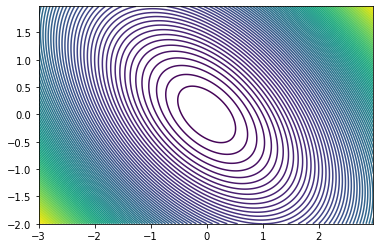

In [3]:
#como que chama a função para vários pontos e plota-o;
delta = 0.025
x = np.arange(-3.0, 3.0 , delta)
y = np.arange(-2.0, 2.0 , delta)
x , y = np.meshgrid(x,y)
z = np.ndarray((len(x),len(x[0])))

for i in range(len(x)):
  for j in range(len(x[0])):
    z[i][j] = f([x[i][j],y[i][j]])

fig, ax = plt.subplots()
cs = ax.contour(x, y, z, 100)
#===============================================================================
x,lx,lfx = gradient_descent(np.array([-2,1]),f,grad,tol=1e-6,alpha=0.5)
print(x)

#===============================================================================

TypeError: ignored

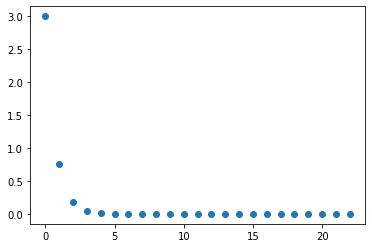

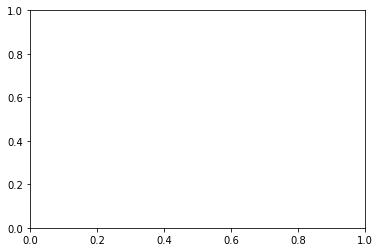

In [4]:
#biblioteca de lista para plotagem
plt.plot(lfx,'o')
x0 = [x[0] for x in lx]
x1 = [x[1] for x in lx]


fig, ax = plt.subplots()
ax.contour(x, y, z, 100)
ax.plot(x0,x1,'^b-')
ax.plot(x[0],x[1],'or')
